In [8]:
# python3, jupyternotebook, windows
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder


ModuleNotFoundError: No module named 'pandas'

In [549]:
main = pd.read_csv("C:/Users/taehee/Desktop/kakao/kakao1.csv")

# 1. 데이터 탐색

In [550]:
main.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [586]:
main.info()
# 직업정보가 없는 경우 ? 로 나타난다
main.isnull().any().any()
# 다른 결측값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


False

In [587]:
new_main=main
new_main=new_main.drop_duplicates()
# 데이터 중복을 제거 한다
# 신용정보이기 때문에 모든 열이 중복이면 같은 사람이라고 판단

# 모든 열이 중복된 행 24개 제거 됨

In [588]:
new_main=new_main.replace('?','no-info')
# 직업정보를 미기입한 사람들의 특성이 드러날 수도 있기 때문에 삭제 하지 않는다
# 따라서 ?를 no-info로 바꾸어준다

<function matplotlib.pyplot.show>

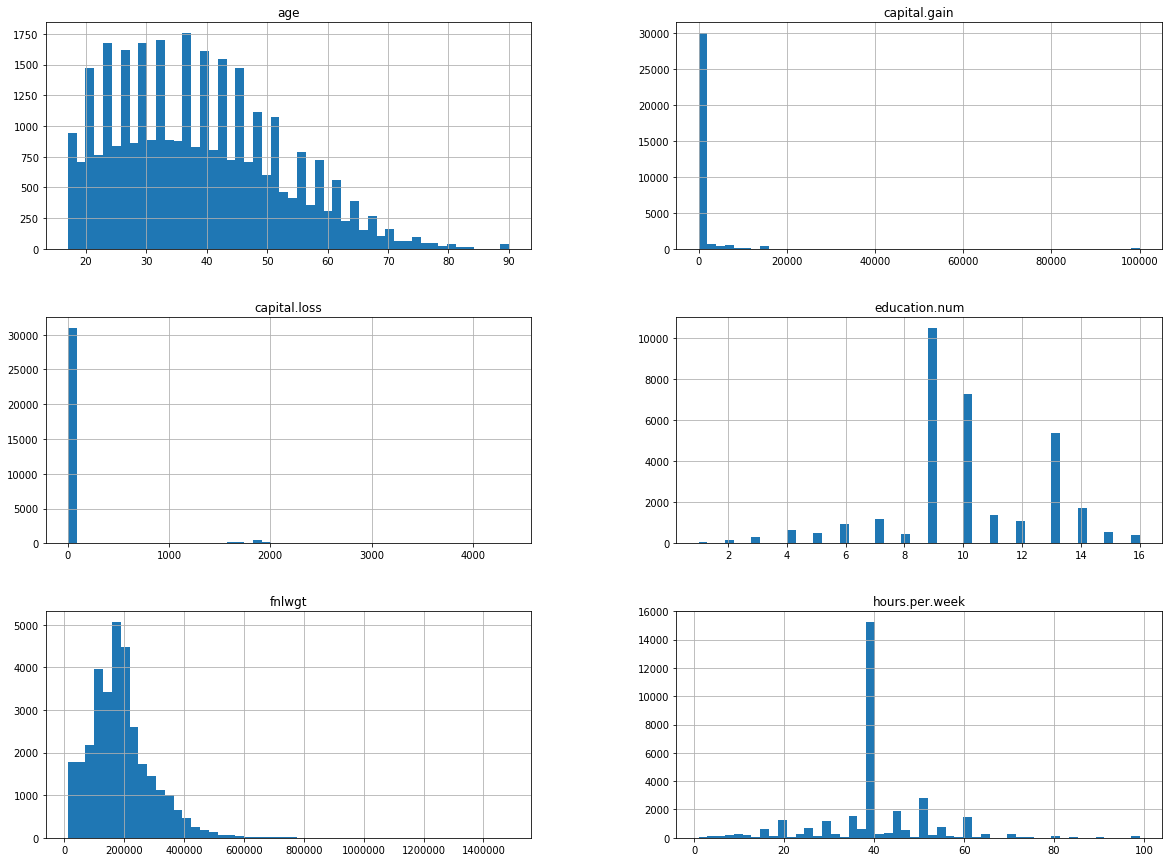

In [589]:
# 수치형 데이터 탐색
new_main.hist(bins=50,figsize=(20,15))
plt.show
# 연령대는 성인이상에서 정규분포를 보임
# capital.gain,loss,hour.per.week는  x range가 크고 도수가 많아서
#  적당한 도수를 가지는 서열 척도로 변형할 필요가 있음
# 혹은 표준화 시켜줘야 함

In [590]:
corr_new_main=new_main.corr()
corr_new_main
# 연속형 데이터 중에 큰 상관관계 (0.7>)을 보이는 경우는 없으니, 모두 사용

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education.num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital.gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital.loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours.per.week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


In [591]:
new_main['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

In [622]:
data=new_main[['age','fnlwgt','capital.gain','capital.loss','hours.per.week']]

In [623]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 5 columns):
age               32537 non-null int64
fnlwgt            32537 non-null int64
capital.gain      32537 non-null int64
capital.loss      32537 non-null int64
hours.per.week    32537 non-null int64
dtypes: int64(5)
memory usage: 1.5 MB


# 2. 데이터 전처리

In [624]:
# 범주형 자료에 대한 분포 확인
new_main['workclass'].value_counts()
# no-info는 without-pay와 never-worked 의 무소득자일 수 있으므로  나중에 함께 그루핑 시도

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
no-info              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [625]:
df1=pd.get_dummies(new_main['workclass'], prefix='workclass')

In [626]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 5 columns):
age               32537 non-null int64
fnlwgt            32537 non-null int64
capital.gain      32537 non-null int64
capital.loss      32537 non-null int64
hours.per.week    32537 non-null int64
dtypes: int64(5)
memory usage: 1.5 MB


In [627]:
data=pd.concat([data,df1],axis=1)

In [628]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
age                           32537 non-null int64
fnlwgt                        32537 non-null int64
capital.gain                  32537 non-null int64
capital.loss                  32537 non-null int64
hours.per.week                32537 non-null int64
workclass_Federal-gov         32537 non-null uint8
workclass_Local-gov           32537 non-null uint8
workclass_Never-worked        32537 non-null uint8
workclass_Private             32537 non-null uint8
workclass_Self-emp-inc        32537 non-null uint8
workclass_Self-emp-not-inc    32537 non-null uint8
workclass_State-gov           32537 non-null uint8
workclass_Without-pay         32537 non-null uint8
workclass_no-info             32537 non-null uint8
dtypes: int64(5), uint8(9)
memory usage: 1.8 MB


## education 과 education.num 전처리 -----------------------

In [629]:
new_main['education'].value_counts()
# 범주형자료가 매우 많아서 적절한 기준으로 통합이 필요함
# education.num은 사실상 같음

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [630]:
edu_dic={
        'Preschool':'UnderHS',
        '1st-4th':'UnderHS',
        '5th-6th':'UnderHS',
        '7th-8th':'UnderHS',
        '9th':'UnderHS',
        '11th':'UnderHS',    
        '10th':'UnderHS',
        '12th':'UnderHS',
        'HS-grad':'High-School',
        'Assoc-acdm':'Assoc',
        'Assoc-voc':'Assoc', 
        'Some-college':'College', #2년제
        'Prof-school':'College',
        'Bachelors':'Bachelors',
        'Masters':'Masters',
        'Doctorate':'Doctorate'
        }

In [631]:
new_main['c_education']=new_main['education'].apply(lambda x: edu_dic[x])
new_main['c_education'].value_counts()
# 7개의 범주로 정리

High-School    10494
College         7858
Bachelors       5353
UnderHS         4248
Assoc           2449
Masters         1722
Doctorate        413
Name: c_education, dtype: int64

In [632]:
df2=pd.get_dummies(new_main['c_education'], prefix='c_education')

In [634]:
data=pd.concat([data,df2],axis=1)

## marital.status 전처리 ----------------------------------------

In [635]:
new_main['marital.status'].value_counts()
# 정확히 데이터를 이해하여 범주를 합칠 필요가 있음

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [636]:
marry_dic={
    'Married-civ-spouse':'Married',
    'Married-AF-spouse':'Married',
    'Never-married':'Never_Married',
    'Divorced':'Single',
    'Separated':'Single',
    'Married-spouse-absent':'Single',
    'Widowed':'Single'
}

In [637]:
new_main['c_marry']=new_main['marital.status'].apply(lambda x: marry_dic[x])
new_main['c_marry'].value_counts()

Married          14993
Never_Married    10667
Single            6877
Name: c_marry, dtype: int64

In [638]:
df2=pd.get_dummies(new_main['c_marry'], prefix='c_marry')
data=pd.concat([data,df2],axis=1)

## occupation 전처리 ----------------------------------------

In [417]:
new_main['occupation'].value_counts()
# 직업군은 그대로 보존

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
no-info              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [639]:
df2=pd.get_dummies(new_main['occupation'], prefix='occupation')
data=pd.concat([data,df2],axis=1)

## relationship 전처리 ----------------------------------------

In [640]:
new_main['relationship'].value_counts()

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [419]:
new_main.loc[:,('relationship','sex')].tail()
# 남편, 아내는 스스로를 나타내고, 다른 것들은 가족관계를 나타냄
# 다른 변수들로 재조정 어려워서 그대로 씀

,relationship,sex
32556,Not-in-family,Male
32557,Wife,Female
32558,Husband,Male
32559,Unmarried,Female
32560,Own-child,Male


In [641]:
df2=pd.get_dummies(new_main['relationship'], prefix='relationship')
data=pd.concat([data,df2],axis=1)

## race, sex 확인 -------------------------------

In [420]:
new_main['race'].value_counts()
# 이대로 사용가능

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [642]:
df2=pd.get_dummies(new_main['race'], prefix='race')
data=pd.concat([data,df2],axis=1)

In [643]:
new_main['sex'].value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

In [644]:
df2=pd.get_dummies(new_main['sex'], prefix='sex')
data=pd.concat([data,df2],axis=1)

## capital.gain , capital.loss 전처리 ------------------------

In [645]:
new_main['capital.gain'].value_counts()
# 연속형으로사용할 수도 있고, 범주형으로 사용할 수도 있음
#  테스팅해보며 예측율을 높여주는 방향으로 사용, 아마 범주형이 좋을듯 하다

0        29825
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
         ...  
9562         4
1086         4
25124        4
1424         3
2961         3
7896         3
4687         3
2936         3
1173         3
5721         3
2009         3
6360         3
41310        2
6723         2
3456         2
2993         2
401          2
11678        2
2062         2
18481        2
7978         1
1639         1
2538         1
2387         1
5060         1
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital.gain, Length: 119, dtype: int64

In [646]:
new_main['capital.gain'].describe()
# 범위가 매우크고 매우 치우쳐져 있음
# 후처리할때 정규화하여 성능이 올라가는지 확인 할 것

count    32537.000000
mean      1078.443741
std       7387.957424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

In [647]:
c_gain=new_main['capital.gain'].values.reshape(-1,1)

In [648]:
from sklearn.preprocessing import StandardScaler, RobustScaler

c_gain_RobustScaler = RobustScaler().fit_transform(c_gain)

(array([3.1767e+04, 5.1700e+02, 8.7000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

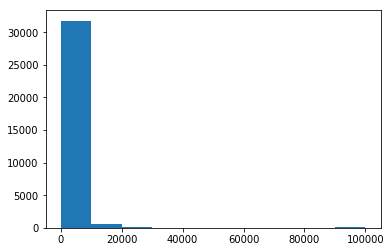

In [649]:
plt.hist(c_gain_RobustScaler)
# 표준화 시켜도 여전히 0과잉을 보임

In [651]:
data['std_c_gain']=c_gain_RobustScaler
data.head()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,std_c_gain
0,90,77053,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0.0
1,82,132870,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0.0
2,66,186061,0,4356,40,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0.0
3,54,140359,0,3900,40,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0.0
4,41,264663,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0.0


In [652]:
new_main['capital.loss'].value_counts()
# 상동

0       31018
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
1669       24
1741       24
2001       24
1980       23
1719       22
2002       21
2051       21
1408       21
1579       20
2377       20
1721       18
1504       18
1974       18
2339       17
2179       15
1628       15
        ...  
323         3
4356        3
2267        3
3683        2
1755        2
2352        2
1648        2
1138        2
810         2
1735        2
2238        2
2754        2
3004        2
3900        2
974         2
2149        2
1816        2
3770        2
2080        1
2489        1
2282        1
2163        1
155         1
2467        1
1844        1
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital.loss, Length: 92, dtype: int64

(array([3.1029e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
        2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <a list of 10 Patch objects>)

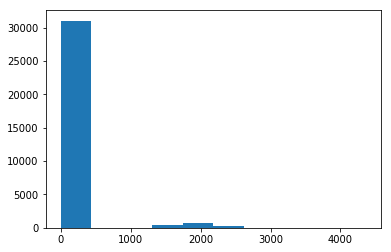

In [653]:
c_loss=new_main['capital.loss'].values.reshape(-1,1)

c_loss_RobustScaler = RobustScaler().fit_transform(c_loss)
plt.hist(c_loss_RobustScaler)
# 여전히 0과잉을 보임

In [654]:
data['std_c_loss']=c_loss_RobustScaler
data.head()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,std_c_gain,std_c_loss
0,90,77053,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0.0,4356.0
1,82,132870,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0.0,4356.0
2,66,186061,0,4356,40,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0.0,4356.0
3,54,140359,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0.0,3900.0
4,41,264663,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0.0,3900.0


## hours.per.week 전처리 --------------------------------------

In [655]:
new_main['hours.per.week'].value_counts()
# 상동

40    15204
50     2817
45     1823
60     1475
35     1296
20     1224
30     1148
55      693
25      674
48      516
38      476
15      404
70      291
10      275
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
      ...  
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89        2
97        2
88        2
86        2
61        2
95        2
92        1
94        1
87        1
74        1
82        1
Name: hours.per.week, Length: 94, dtype: int64

In [656]:
new_main.describe()
# 평균이 40이고 표준편차가 12, 하지만 1Q,3Q가 모두 40~50 사이이므로 영향력이 적을 듯함
# capital과 마친가지로 그대로 사용해보고, 모델성능을 올리기 위해서 후처리 해봄

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,std_c_gain
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,1078.443741
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,7387.957424
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,99999.000000


(array([  733.,  2191.,  2316., 17721.,  5934.,  1057.,  1796.,   448.,
          202.,   139.]),
 array([-7.8 , -5.84, -3.88, -1.92,  0.04,  2.  ,  3.96,  5.92,  7.88,
         9.84, 11.8 ]),
 <a list of 10 Patch objects>)

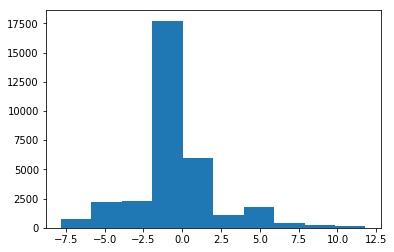

In [658]:
# 파생변수
std_hr_week=new_main['hours.per.week'].values.reshape(-1,1)

std_hr_week_RobustScaler = RobustScaler().fit_transform(std_hr_week)
plt.hist(std_hr_week_RobustScaler)
# 여전히 0과잉을 보임

In [659]:
data['std_hr_week']=std_hr_week_RobustScaler

## native.country 전처리 ------------------------------------

In [662]:
new_main['native.country'].value_counts()
# 국가별로 특성이 같다고 보기는 힘들지만, 카테고리가 매우 많기 때문에 카테고리 병함
# 카테고리를 병합할 근거자료가 없기 때문에, 상식적인 지리구분으로 병합
# south는 예측 불가하므로 no-info에 포함

United-States                 29153
Mexico                          639
no-info                         582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [663]:
new_main.shape

(32537, 18)

In [664]:
32537/20
#미국을 제외한 다른 국가들은 모두 5% 미만(>1626)이기 때문에 모두 병합한다

1626.85

In [665]:
native_nation={'United-States':'US-canada','Canada':'US-canada','Outlying-US(Guam-USVI-etc)':'US-canada'
                ,'no-info':'no-info','Mexico':'Latin-america','Puerto-Rico':'Latin-america',
               'El-Salvador':'Latin-america','Philippines':'Asia_pac','Germany':'Europe',
               'India':'Asia_pac','Cuba':'Latin-america','England':'Europe','Jamaica':'Latin-america',
               'South':'no-info','China':'Asia_pac','Italy':'Europe','Dominican-Republic':'Latin-america',
               'Vietnam':'Asia_pac','Guatemala':'Latin-america','Japan':'Asia_pac',
               'Poland':'Europe','Columbia':'Latin-america','Taiwan':'Asia_pac',
               'Haiti':'Latin-america','Iran':'Asia_pac','Portugal':'Europe',
               'Nicaragua':'Latin-america','Peru':'Latin-america','Greece':'Europe',
               'France':'Europe','Ecuador':'Latin-america','Ireland':'Europe','Hong':'Asia_pac',
               'Cambodia':'Asia_pac','Trinadad&Tobago':'Latin-america','Laos':'Asia_pac',
               'Thailand':'Asia_pac','Yugoslavia':'Europe','Hungary':'Europe','Scotland':'Europe',
               'Honduras':'Latin-america','Holand-Netherlands':'Europe'
              }
# 북미(US-cadada), 중남미(Latin-america),아시아태평양(Asia-Pac),유럽(Europe)으로 구분

In [666]:
native_nation

{'Cambodia': 'Asia_pac',
 'Canada': 'US-canada',
 'China': 'Asia_pac',
 'Columbia': 'Latin-america',
 'Cuba': 'Latin-america',
 'Dominican-Republic': 'Latin-america',
 'Ecuador': 'Latin-america',
 'El-Salvador': 'Latin-america',
 'England': 'Europe',
 'France': 'Europe',
 'Germany': 'Europe',
 'Greece': 'Europe',
 'Guatemala': 'Latin-america',
 'Haiti': 'Latin-america',
 'Holand-Netherlands': 'Europe',
 'Honduras': 'Latin-america',
 'Hong': 'Asia_pac',
 'Hungary': 'Europe',
 'India': 'Asia_pac',
 'Iran': 'Asia_pac',
 'Ireland': 'Europe',
 'Italy': 'Europe',
 'Jamaica': 'Latin-america',
 'Japan': 'Asia_pac',
 'Laos': 'Asia_pac',
 'Mexico': 'Latin-america',
 'Nicaragua': 'Latin-america',
 'Outlying-US(Guam-USVI-etc)': 'US-canada',
 'Peru': 'Latin-america',
 'Philippines': 'Asia_pac',
 'Poland': 'Europe',
 'Portugal': 'Europe',
 'Puerto-Rico': 'Latin-america',
 'Scotland': 'Europe',
 'South': 'no-info',
 'Taiwan': 'Asia_pac',
 'Thailand': 'Asia_pac',
 'Trinadad&Tobago': 'Latin-america',
 

In [670]:
new_main['native_nations']=new_main['native.country'].apply(lambda x: native_nation[x])

In [671]:
new_main['native_nations'].value_counts() 
# 다섯개로 잘 나뉘어짐

US-canada        29288
Latin-america     1395
Asia_pac           671
no-info            662
Europe             521
Name: native_nations, dtype: int64

In [673]:
df2=pd.get_dummies(new_main['native_nations'], prefix='native_nations')
data=pd.concat([data,df2],axis=1)

In [1026]:
data['income']=np.where(new_main['income']=='<=50K',0,1)

In [1027]:
data['income'].value_counts()

0    24698
1     7839
Name: income, dtype: int64

In [1028]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 61 columns):
age                             32537 non-null int64
fnlwgt                          32537 non-null int64
capital.gain                    32537 non-null int64
capital.loss                    32537 non-null int64
hours.per.week                  32537 non-null int64
workclass_Federal-gov           32537 non-null uint8
workclass_Local-gov             32537 non-null uint8
workclass_Never-worked          32537 non-null uint8
workclass_Private               32537 non-null uint8
workclass_Self-emp-inc          32537 non-null uint8
workclass_Self-emp-not-inc      32537 non-null uint8
workclass_State-gov             32537 non-null uint8
workclass_Without-pay           32537 non-null uint8
workclass_no-info               32537 non-null uint8
c_education_Assoc               32537 non-null uint8
c_education_Bachelors           32537 non-null uint8
c_education_College             32537 non-n

(32537, 61)

In [997]:
data.head()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,sex_Male,std_c_gain,std_c_loss,std_hr_week,native_nations_Asia_pac,native_nations_Europe,native_nations_Latin-america,native_nations_US-canada,native_nations_no-info,income
0,90,77053,0,4356,40,0,0,0,0,0,...,0,0.0,4356.0,0.0,0,0,0,1,0,0
1,82,132870,0,4356,18,0,0,0,1,0,...,0,0.0,4356.0,-4.4,0,0,0,1,0,0
2,66,186061,0,4356,40,0,0,0,0,0,...,0,0.0,4356.0,0.0,0,0,0,1,0,0
3,54,140359,0,3900,40,0,0,0,1,0,...,0,0.0,3900.0,0.0,0,0,0,1,0,0
4,41,264663,0,3900,40,0,0,0,1,0,...,0,0.0,3900.0,0.0,0,0,0,1,0,0


# 3. 데이터 모델링

In [764]:
from sklearn.model_selection import train_test_split

In [822]:
train_set,test_set = train_test_split(data,test_size=0.3,random_state=42)

In [823]:
train_set['income'].value_counts()

0    17304
1     5471
Name: income, dtype: int64

In [824]:
test_set['income'].value_counts()

0    7394
1    2368
Name: income, dtype: int64

In [766]:
from sklearn.ensemble  import RandomForestClassifier

In [1022]:
rf=RandomForestClassifier(n_estimators=100,max_leaf_nodes=8,n_jobs=-1,max_depth=2)

In [1023]:
rf.fit(train_set,train_set['income'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=8,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1024]:
rf.score(test_set,test_set['income'])

0.9595369801270232

##  과적합(overfitting) 가능성이 매우 크기 때문에 cv 시도

In [975]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']

In [976]:
scores = cross_validate(rf, data, data.income, scoring=scoring,  cv=5, return_train_score=False)

In [977]:
sorted(scores.keys())
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [978]:
scores

{'fit_time': array([0.39995575, 0.28523254, 0.41289449, 0.39994168, 0.42086673]),
 'score_time': array([0.2194221 , 0.33810472, 0.23939896, 0.21939945, 0.22343898]),
 'test_precision_macro': array([0.91213695, 0.98650778, 0.98110635, 0.98007387, 0.97979405]),
 'test_recall_macro': array([0.94142206, 0.95631378, 0.93813776, 0.9346301 , 0.93363114])}

In [979]:
print(scores['test_precision_macro'].mean())
print(scores['test_recall_macro'].mean())
# 평균 정확도와 재현율
# 이 문제에서는 관계없지만 주제에 따라서 정확도와 재현율 중에 우선순위를 정해야함

0.9679238009475386
0.9408269679481072


## 다른모델로 분류하기(LogisticRegression)

In [980]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [981]:
scores = cross_validate(lr, data, data.income, cv=5, return_train_score=False)

In [982]:
scores

{'fit_time': array([0.17552924, 0.18450618, 0.16953468, 0.26133251, 0.1785059 ]),
 'score_time': array([0.00299239, 0.00301814, 0.00296712, 0.00399899, 0.003968  ]),
 'test_score': array([0.72510756, 0.83758451, 0.75906577, 0.75887506, 0.7591454 ])}

In [926]:
print(scores['test_score'].mean())
# 평균 정확도

0.7679556596762789


## 다른모델로 분류하기(SVM)

In [1046]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [1047]:
clf = LinearSVC(C=1,loss='hinge')  # 선형 분류
clf2=SVC(kernel="poly",degree=3,coef0=1,C=5)  #다항식 커널

In [1048]:
from sklearn import metrics
scores = cross_val_score( clf, data, data.income, cv=5)

In [1049]:
scores
# sampling에 따라서 성능에 많은 차이가 나며, 예측율이 낮음

array([0.74308543, 0.76075599, 0.75906577, 0.75902874, 0.7591454 ])

In [1050]:
print(scores.mean())

0.7562162667346886


In [1053]:
scores = cross_val_score( clf, data, data.income, cv=10) # 10번 교차검증

In [1054]:
print(scores.mean())

0.6035733694494306


### 평균성능은 RF,LogisticRegression,SVM 순으로 RF가 가장 좋음

### 하지만 RF,Adam,XGboost 등 트리구조는 과적합일 가능성이 큼

#  4.영향력이 높은 컬럼

In [1]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, fig_id)

def save_fig(fig_id, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
y = data['income']

data2=data.drop(['income'],1)

X = data2 # petal length and width
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

NameError: name 'data' is not defined

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("RF.dot"),
        feature_names=data2.columns.values,
        class_names=['udner50','over50'],
        rounded=True,
        filled=True
    )

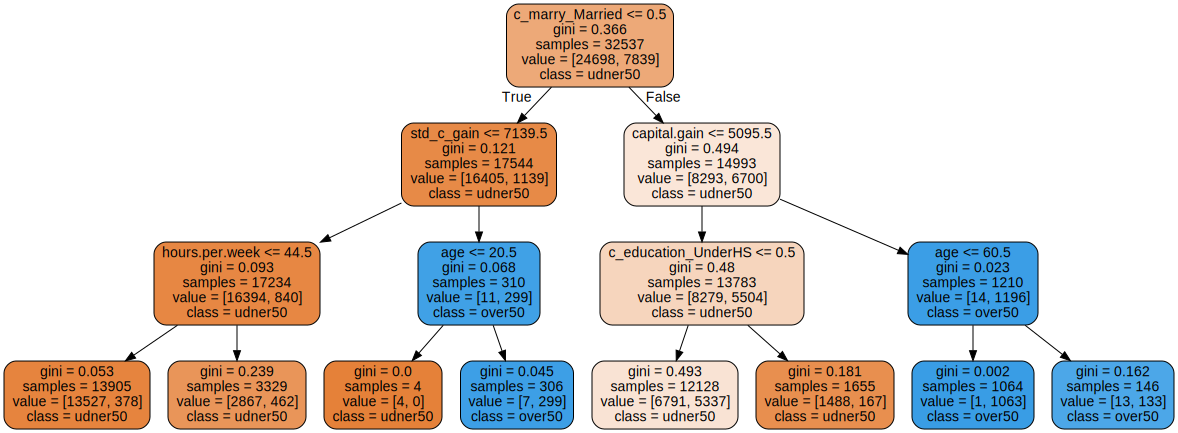

In [1040]:
import graphviz
with open("RF.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='images/decision_trees', cleanup=True)
dot

##  간단한 트리구조결과: (오차율이 306/32537)늘어나지만,depth=2 이면 충분함
### c_marry_married 라는 결혼여부, 표준화된 소득,raw소득,연령순으로 중요하다

#  문제2.  적은 데이터에 준지도학습 방법을 사용하는 것   이외에는 1번과 동일하므로 시간 관계상 생략